# Simple Linear Regression

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df = pd.read_csv('height-weight.csv')

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

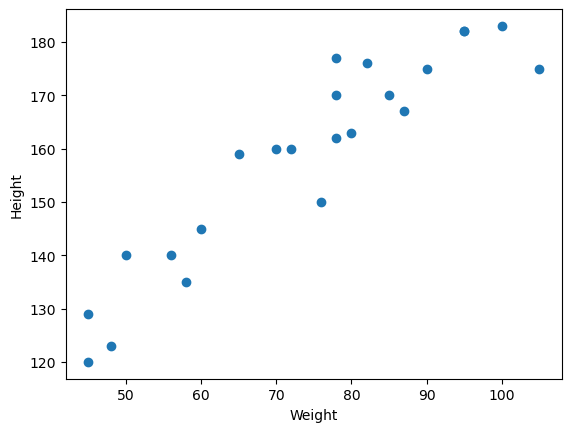

In [10]:
plt.scatter(df['Weight'] , df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

## Divide dataset into indep & dep feature

In [24]:
X = df[['Weight']] ## Independent feature
y = df[['Height']] ## dependent feature

## Train- Test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [27]:
X.shape

(23, 1)

In [28]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((18, 1), (5, 1), (18, 1), (5, 1))

## Standardization of Dataset Train Independent data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

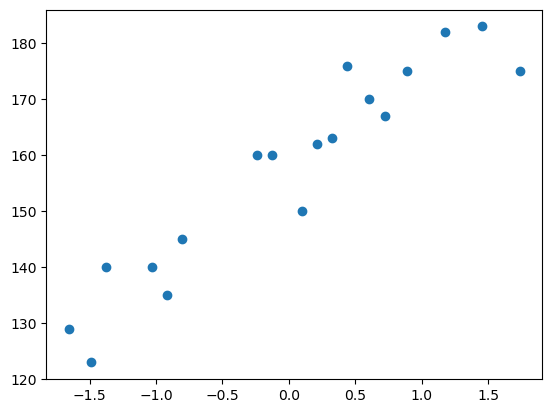

In [38]:
plt.scatter(X_train, y_train)

## Train thr Model - Simpple Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
regressor = LinearRegression()

In [41]:
regressor.fit(X_train , y_train)

LinearRegression()

In [45]:
print(" The slope or coefficient of weight is", regressor.coef_)
print("Intercept : " , regressor.intercept_)

 The slope or coefficient of weight is [[17.03440872]]
Intercept :  [157.5]


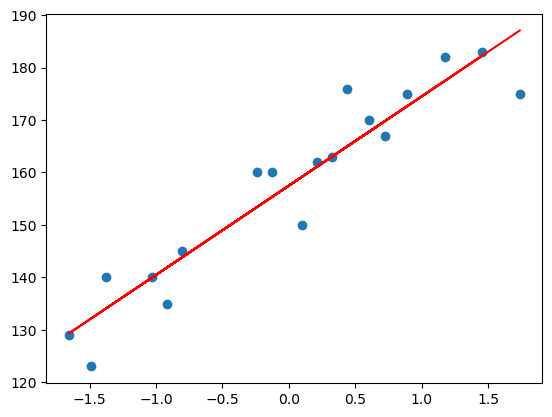

In [51]:
## Create best fit line - q0 + q1*x , q0 = 157 , q1 = 17
plt.scatter(X_train , y_train)
plt.plot(X_train , regressor.predict(X_train) , 'r')

### Prediction of Train data 

1. predicted heigh output = intercept + coef_(weight)
2 . Y_pred_train = 157.5 + 17.03(X_train)
                                 
### Prediction of Test data 

1. predicted heigh output = intercept + coef_(weight)
2 . Y_pred_test157.5 + 17.03(X_test)

In [52]:
y_pred_test = regressor.predict(X_test)

In [55]:
y_pred_test , y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

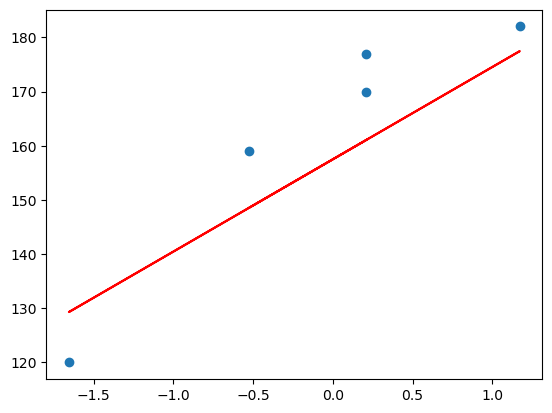

In [57]:
plt.scatter(X_test , y_test)
plt.plot(X_test , regressor.predict(X_test) , 'r' )

## Performance matrix
### MSE , MAE , RMSE
### R squared & adjusted R squared

In [58]:
from sklearn.metrics import mean_squared_error , mean_absolute_error 

In [60]:
mse = mean_squared_error(y_test , y_pred_test)
mae = mean_absolute_error(y_test , y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [64]:
from sklearn.metrics import r2_score

# R squre 
Formula

* R^2 = 1-SSR/SST

R^2 = coeff of determination SSR + sum of all sqaures of residuals SST = total sum of sqaures

In [62]:
score = r2_score(y_test , y_pred_test)

In [63]:
score

0.776986986042344

## Adjusted R square

 ### Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
 
 Where 
 n = no of obs
 k = no of predictor variables

In [67]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [68]:
regressor

LinearRegression()

In [69]:
## New data point weight is 80

scaled_weight =scaler.transform([[80]])
scaled_weight

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [77]:
print("The height prediction for weight 80 kg is" , regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is [[163.01076266]]


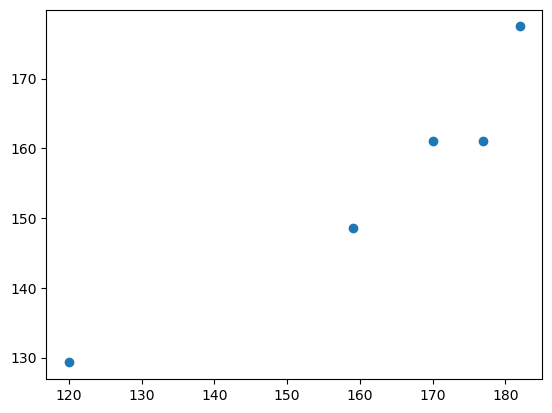

In [78]:
## Assumption

plt.scatter(y_test , y_pred_test)

if scatter plot is linearly distributed we can consider it as a good predictions

In [79]:
## Residuals
residuals = y_test , y_pred_test
residuals

(    Height
 15     177
 9      170
 0      120
 8      182
 17     159,
 array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]))

/tmp/ipykernel_124/1984056971.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<AxesSubplot: ylabel='Density'>

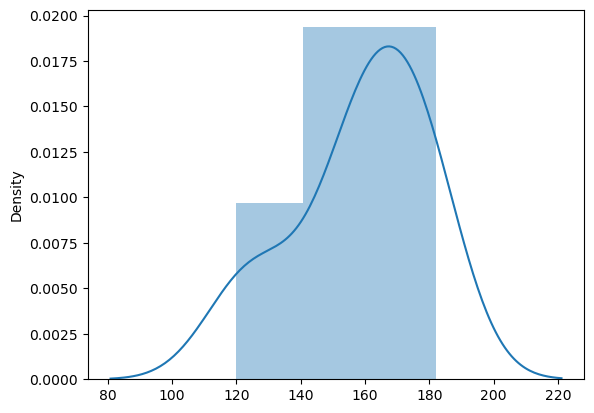

In [85]:
## plot residulas
sns.distplot(residuals)

if plot of residuals is normal distribution then predictions are created better